# 1.1 **Regression**

### **1.1.1 Generating examples**

In [ ]:
#Listing 1.1: Generating examples.
import numpy as np

def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 40
X = np.random.rand(n_samples)
X_train = np.sort(X[:n_samples//2])
y_train = true_fun(X_train) + np.random.randn(n_samples//2) * 0.1
X_test = np.sort(X[n_samples//2:])
y_test = true_fun(X_test) + np.random.randn(n_samples//2) * 0.1

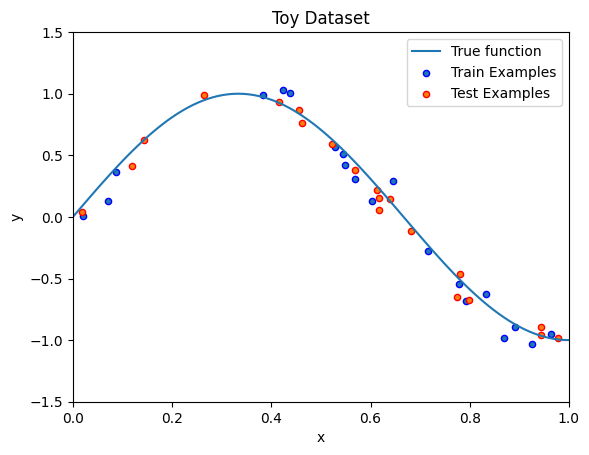

In [ ]:
#Listing 1.2: Plotting the dataset.
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Examples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Toy Dataset")
plt.show()

### **1.1.2 Linear regression**

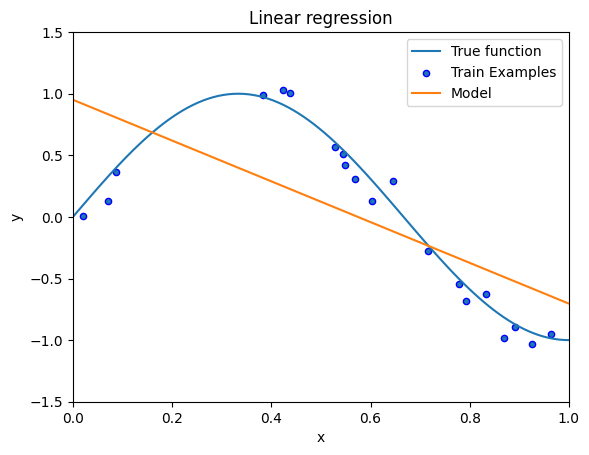

In [ ]:
#Listing 1.3: Linear regression.

from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train[:, np.newaxis], y_train)

plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Train Examples")
plt.plot(x, linear_regression.predict(x[:, np.newaxis]), label="Model")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))

plt.legend(loc="best")
plt.title("Linear regression")
plt.show()

### Task 1: Compute the mean squared error of the learned linear model on the test set.

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict the y values using the linear regression model on the training set
y_train_pred = linear_regression.predict(X_train[:, np.newaxis])

# Compute the mean squared error for the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Predict the y values using the linear regression model on the test set
y_test_pred = linear_regression.predict(X_test[:, np.newaxis])

# Compute the mean squared error for the test set
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error on the Training Set: {mse_train}")
print(f"Mean Squared Error on the Test Set: {mse_test}")


Mean Squared Error on the Training Set: 0.24649175055916644
Mean Squared Error on the Test Set: 0.1736489094130998


### **1.1.3 Polynomial regression**

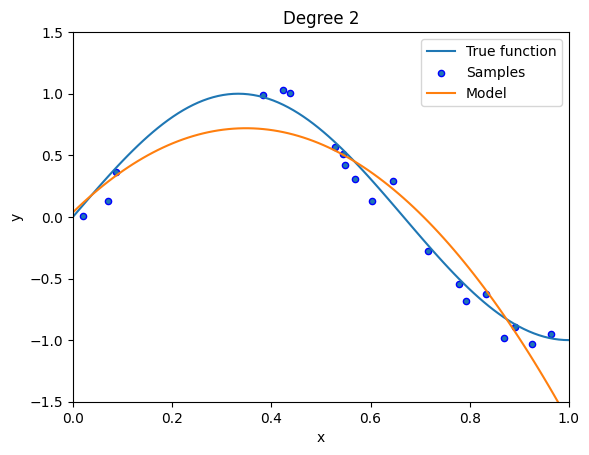

In [ ]:
#Listing 1.4: Quadratic model.

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(2, include_bias=True)
q_model = LinearRegression()
q_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)
x = np.linspace(0, 1, 100)
plt.plot(x, true_fun(x), label="True function")
plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")
plt.plot(x, q_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label="Model")

plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
plt.title("Degree 2")
plt.show()

### Task 2: Repeat the previous part with polynomials with degree 3 and4 and 15.


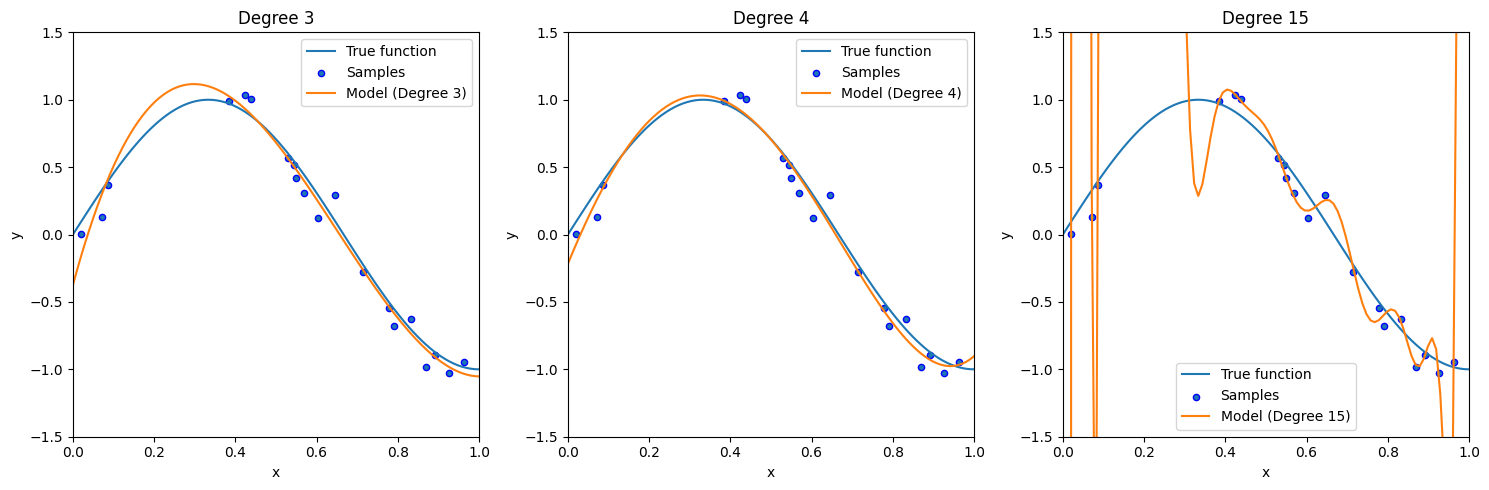

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Define degrees for the polynomial models
degrees = [3, 4, 15]

# Create subplots to display the models
plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees, 1):
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree, include_bias=True)

    # Create and fit the polynomial model
    poly_model = LinearRegression()
    poly_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

    # Plot the true function
    plt.subplot(1, 3, i)
    plt.plot(x, true_fun(x), label="True function")

    # Plot the training examples
    plt.scatter(X_train, y_train, edgecolor="b", s=20, label="Samples")

    # Plot the polynomial model
    plt.plot(x, poly_model.predict(polynomial_features.fit_transform(x[:, np.newaxis])), label=f"Model (Degree {degree})")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.5, 1.5))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}")

plt.tight_layout()
plt.show()

### Task 3: Compute the mean squared error of the learned models on the test set. Which model is the best?


In [ ]:
from sklearn.metrics import mean_squared_error

# Define degrees for the polynomial models
degrees = [3, 4, 15]

for degree in degrees:
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree, include_bias=True)

    # Create and fit the polynomial model on the training set
    poly_model = LinearRegression()
    poly_model.fit(polynomial_features.fit_transform(X_train[:, np.newaxis]), y_train)

    # Predict the y values on the training set
    y_train_pred = poly_model.predict(polynomial_features.fit_transform(X_train[:, np.newaxis]))

    # Compute the mean squared error for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)

    # Predict the y values on the test set
    y_test_pred = poly_model.predict(polynomial_features.fit_transform(X_test[:, np.newaxis]))

    # Compute the mean squared error for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)

    print(f"Mean Squared Error (Degree {degree}) on the Training Set: {mse_train}")
    print(f"Mean Squared Error (Degree {degree}) on the Test Set: {mse_test}")
    print()


Mean Squared Error (Degree 3) on the Training Set: 0.01080910975988712
Mean Squared Error (Degree 3) on the Test Set: 0.009675739802320771

Mean Squared Error (Degree 4) on the Training Set: 0.009330520579026787
Mean Squared Error (Degree 4) on the Test Set: 0.004641799299812718

Mean Squared Error (Degree 15) on the Training Set: 0.0012653762307917823
Mean Squared Error (Degree 15) on the Test Set: 503.6525031549251



The degree 4 polynomial model is the best.
It has the lowest mean squared error on the test set (0.0046), which means it generalizes well to new data.
In contrast, the degree 15 model overfits the training data, resulting in a very high error on the test set.

# **1.2 Classification**

## 1.2.1 Generating examples

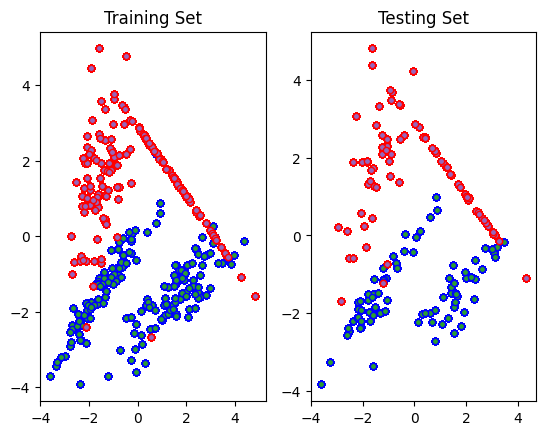

In [ ]:
#Listing 1.5: Toy dataset for classification.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=0, shuffle=True, class_sep=1.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

colors = ["b", "r"]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.set_title("Training Set")

ax2.set_title("Testing Set")

for c in y_train:
    ax1.scatter([X_train[i, 0] for i in np.where(y_train==c)] , [X_train[i, 1] for i in np.where(y_train==c)],
    edgecolor=colors[c], s=20, label="Samples")
    ax2.scatter([X_test[i, 0] for i in np.where(y_test==c)] , [X_test[i, 1] for i in np.where(y_test==c)],
    edgecolor=colors[c], s=20, label="Samples")

## **1.2.2 Classification with random forests**

In [ ]:
#Listing 1.6: Random forest classifier.

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2, criterion="entropy", max_features="sqrt", max_samples=.8, random_state=0)

clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))


Training Accuracy:  0.9552238805970149
Testing Accuracy:  0.9212121212121213


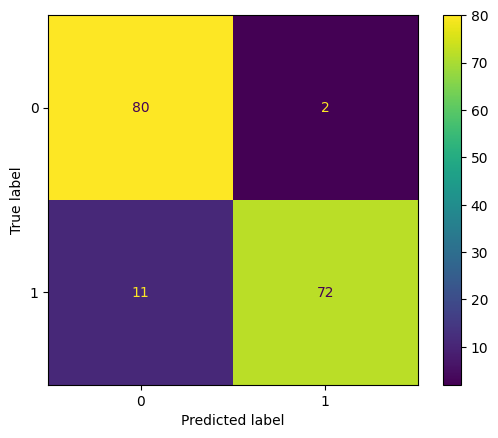

In [ ]:
#Listing 1.7: Confusion Matrix.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Task 4: In the previous example, compute the precision, recall, F1-score. Discuss when accuracy is not the most suitable metric.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predictions on the test set
y_pred = clf.predict(X_test)

# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred) # TP/FP+TP
recall = recall_score(y_test, y_pred) # TP/FN+TP
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.972972972972973
Recall: 0.8674698795180723
F1-score: 0.9171974522292994


Accuracy isn't always the ideal metric to evaluate model performance, especially when the dataset or the impact of predictions is uneven or complex.

Skewed Class Distribution: When one category in the dataset dominates the others, accuracy can be misleading. For example, if 90% of samples belong to a single class, a model that always predicts this majority would achieve 90% accuracy, yet completely miss the minority class.

Unequal Consequences of Errors: In certain applications, some errors are costlier than others. For instance, in healthcare, overlooking a disease (false negative) might have more severe consequences than wrongly diagnosing a healthy individual (false positive). Since accuracy weighs all errors equally, it may not capture the model’s real effectiveness in such scenarios.

Lack of Insight into Error Types: Accuracy shows the proportion of correct predictions but doesn't specify what types of errors occurred. Metrics like precision and recall provide insight into whether the model is overlooking crucial cases or producing excessive false positives.

Multiple Class Challenges: In multi-class classification, overall accuracy can hide poor performance on rare or critical classes. Evaluating metrics such as per-class precision, recall, or F1-score helps better understand how the model performs across different categories.

### Task 5: Train different random forests by changing the number of trees from 2 to 15. Plot the training and testing accuracy of the trained models vs the number of trees. What do you notice?

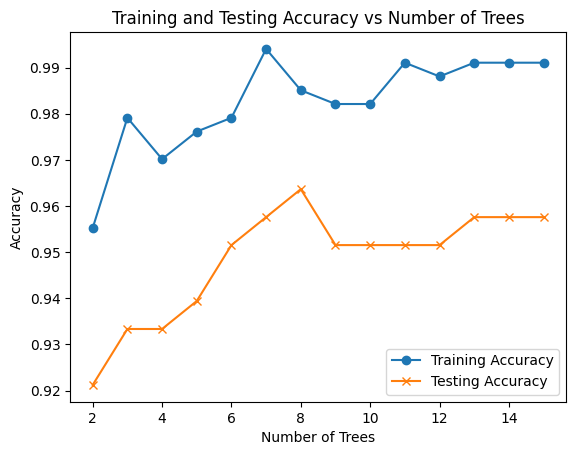

In [ ]:
import matplotlib.pyplot as plt

# Define a range of the number of trees
n_trees_range = range(2, 16)

# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

for n_trees in n_trees_range:
    # Create and fit the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=n_trees, criterion="entropy", max_features="sqrt", max_samples=.8, random_state=0)
    clf.fit(X_train, y_train)

    # Calculate and store training accuracy
    train_accuracy = clf.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Calculate and store testing accuracy
    test_accuracy = clf.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the accuracies
plt.plot(n_trees_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_trees_range, test_accuracies, label='Testing Accuracy', marker='x')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Number of Trees')
plt.legend()
plt.show()

Training Accuracy: When the count of trees grows, the accuracy on the training set usually rises. This happens because more trees allow the model to learn more detailed and complex patterns from the training data.

Testing Accuracy: At the beginning, increasing the number of trees can boost accuracy on the test set as well. However, beyond a certain number, adding extra trees might not improve test accuracy much and could potentially cause overfitting, where the model fits the training data too closely and performs worse on new data.

###  Decision Surface.

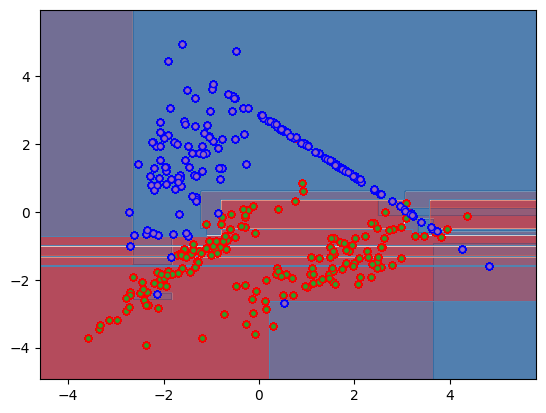

In [ ]:
#Listing 1.8: Decision Surface.
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier

cmap = plt.cm.RdBu
plot_step = 0.02 # fine step width for decision surface contours
clf = RandomForestClassifier(n_estimators=2, criterion="entropy",
max_features="sqrt", max_samples=.8,
random_state=0)
clf.fit(X_train, y_train)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
estimator_alpha = 1.0 / len(clf.estimators_)

for tree in clf.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)
colors = ["r", "b"]
for c in y_train:
    plt.scatter([X_train[i, 0] for i in np.where(y_train==c)] ,[X_train[i, 1] for i in np.where(y_train==c)],edgecolor=colors[c], s=20, label="Samples")

### Task 6: Draw the decision surface for a set of random forests with different number of trees. Do you notice any pattern?

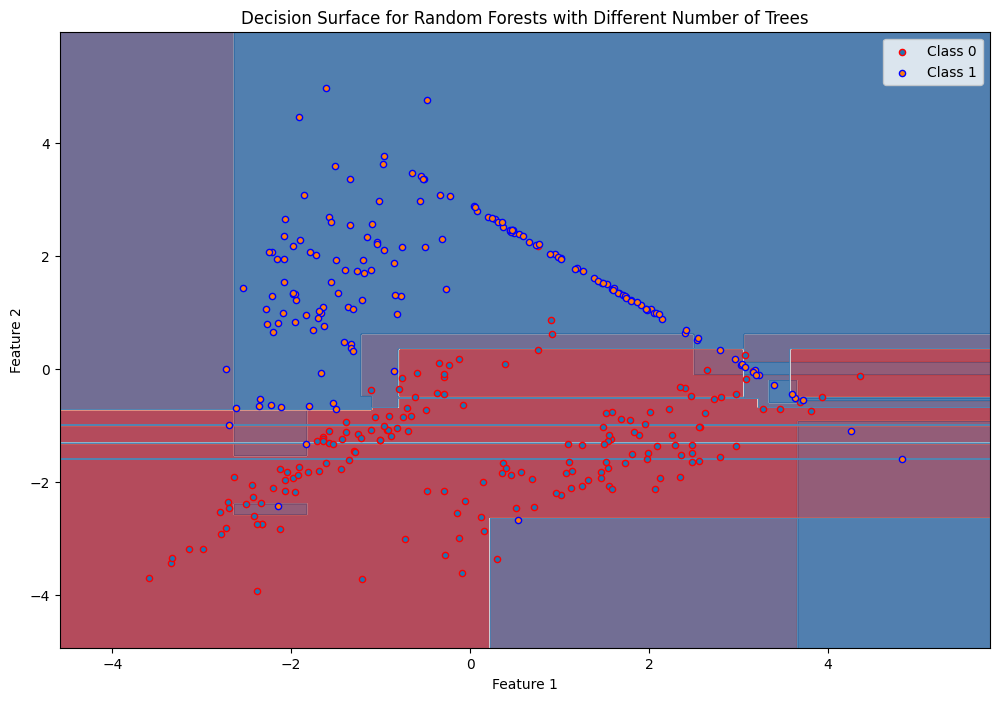

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Function to draw decision surface
def plot_decision_surface(X, y, n_estimators, plot_step=0.02):
    cmap = plt.cm.RdBu
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    plt.figure(figsize=(12, 8))

    for n_trees in n_estimators:
        clf = RandomForestClassifier(n_estimators=n_trees, criterion="entropy", max_features="sqrt", max_samples=.8, random_state=0)
        clf.fit(X, y)
        estimator_alpha = 1.0 / len(clf.estimators_)

        for tree in clf.estimators_:
            Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    # Scatter plot for training samples
    colors = ["r", "b"]
    for c in np.unique(y):
        plt.scatter(X[y == c, 0], X[y == c, 1], edgecolor=colors[c], s=20, label=f"Class {c}")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Surface for Random Forests with Different Number of Trees")
    plt.legend()
    plt.show()

# Use the function with a range of tree numbers
n_estimators_range = [2]
plot_decision_surface(X_train, y_train, n_estimators_range)

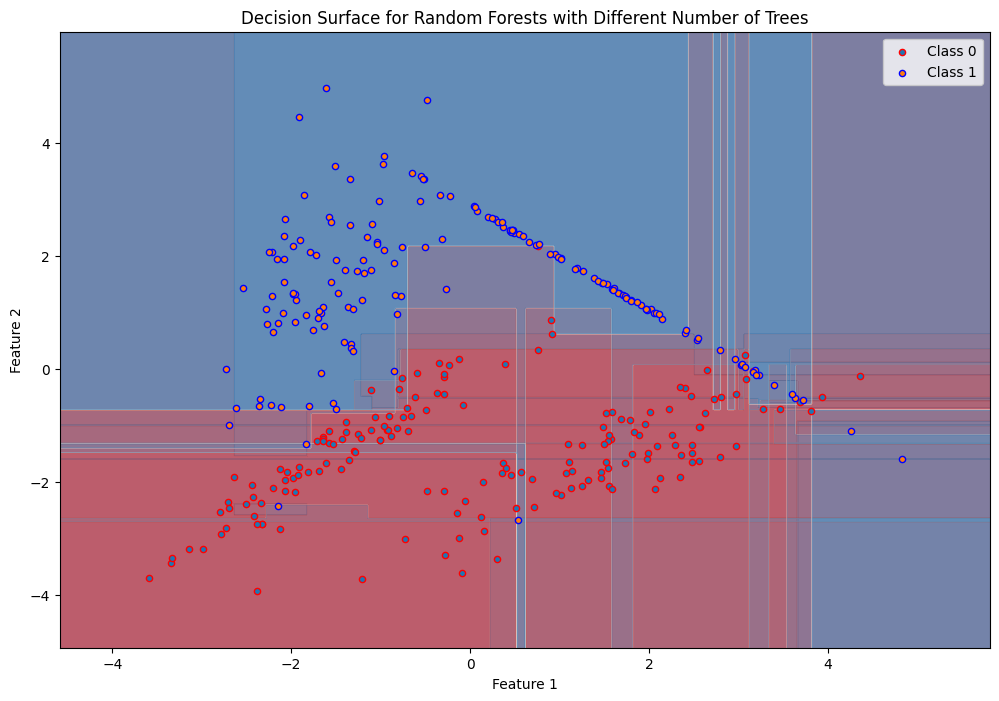

In [ ]:
n_estimators_range = [5]
plot_decision_surface(X_train, y_train, n_estimators_range)

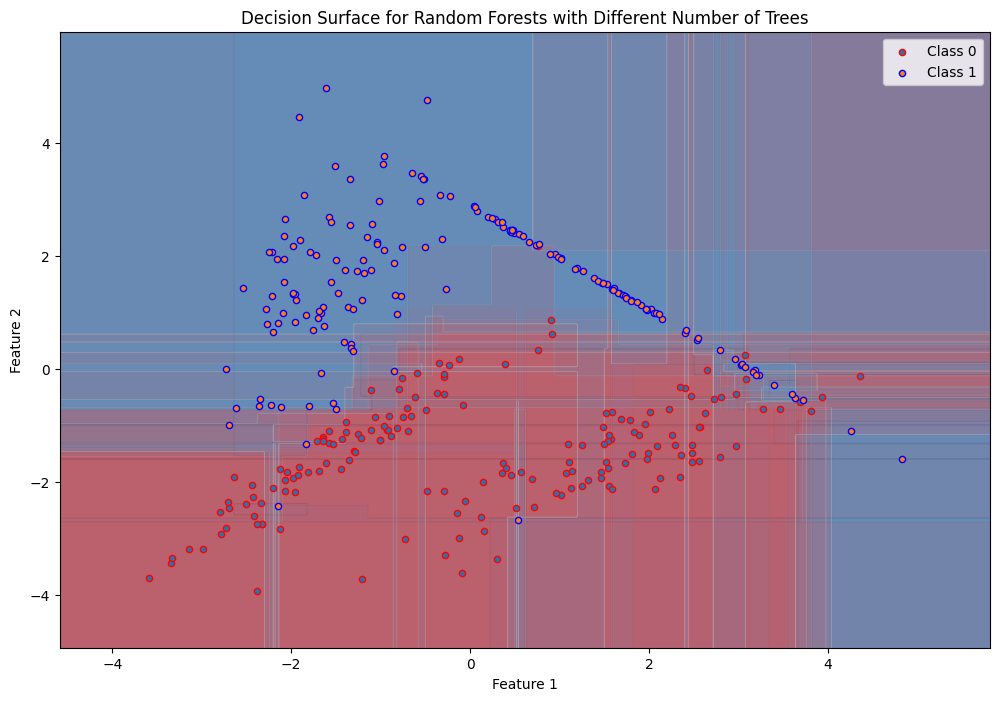

In [ ]:
n_estimators_range = [10]
plot_decision_surface(X_train, y_train, n_estimators_range)

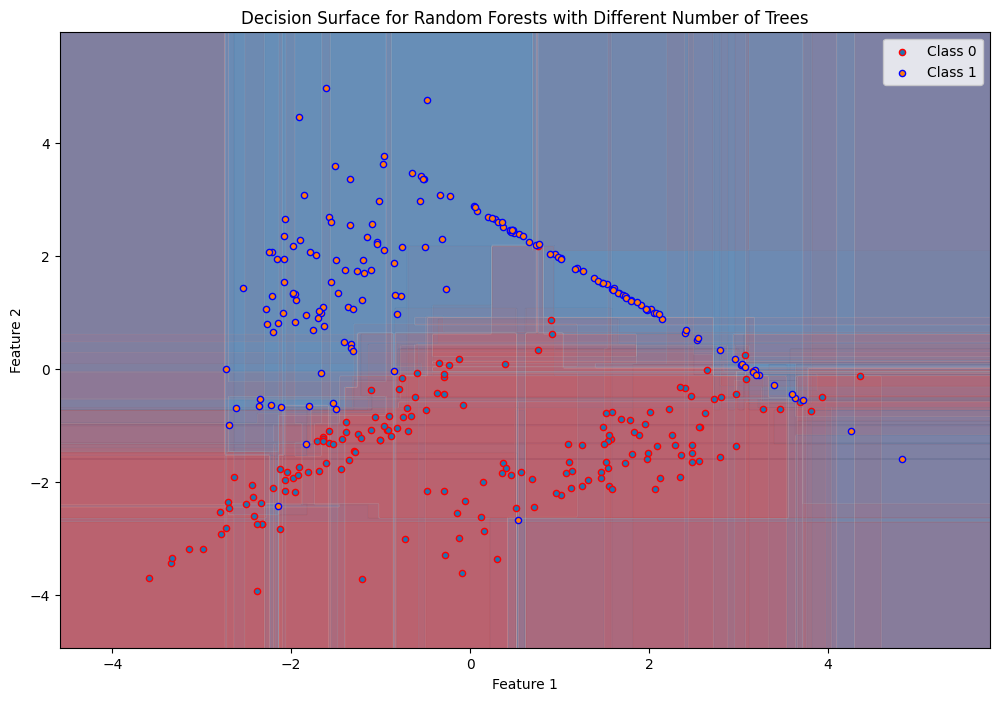

In [ ]:
n_estimators_range = [15]
plot_decision_surface(X_train, y_train, n_estimators_range)

When more trees are added, the decision boundary generally becomes smoother and more stable. This occurs because combining many trees helps lessen the effect of noise and prevents overfitting to the training data.
With fewer trees, the decision boundary can be more influenced by each individual tree, resulting in a less smooth and more irregular shape.

## **1.2.3 Classification with SVM**

In [ ]:
#Listing 1.9: SVM classifier.
from sklearn import svm

clf = svm.SVC(kernel="linear", C=100)
clf.fit(X_train, y_train)
print("Training Accuracy: ",clf.score(X_train, y_train))
print("Testing Accuracy: ",clf.score(X_test, y_test))

Training Accuracy:  0.8895522388059701
Testing Accuracy:  0.896969696969697


### Task 7: Draw the decision surface for the SVM model in the previous example.

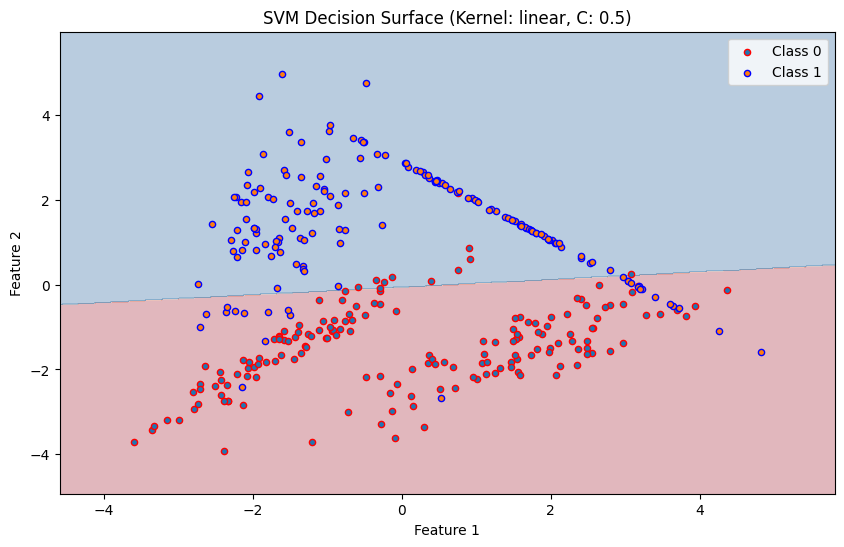

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from matplotlib.colors import ListedColormap

# Function to draw decision surface for SVM
def plot_svm_decision_surface(X, y, kernel, C):
    cmap = plt.cm.RdBu
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Scatter plot for training samples
    colors = ["r", "b"]
    for c in np.unique(y):
        plt.scatter(X[y == c, 0], X[y == c, 1], edgecolor=colors[c], s=20, label=f"Class {c}")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"SVM Decision Surface (Kernel: {kernel}, C: {C})")
    plt.legend()
    plt.show()

# Use the function with the SVM model parameters
plot_svm_decision_surface(X_train, y_train, kernel="linear", C=0.5)


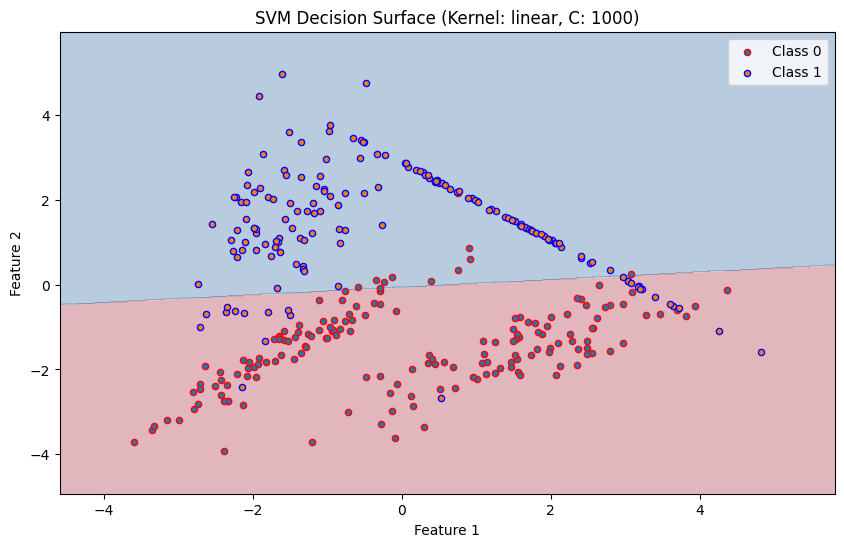

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from matplotlib.colors import ListedColormap

# Function to draw decision surface for SVM
def plot_svm_decision_surface(X, y, kernel, C):
    cmap = plt.cm.RdBu
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    clf = svm.SVC(kernel=kernel, C=C)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Scatter plot for training samples
    colors = ["r", "b"]
    for c in np.unique(y):
        plt.scatter(X[y == c, 0], X[y == c, 1], edgecolor=colors[c], s=20, label=f"Class {c}")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"SVM Decision Surface (Kernel: {kernel}, C: {C})")
    plt.legend()
    plt.show()

# Use the function with the SVM model parameters
plot_svm_decision_surface(X_train, y_train, kernel="linear", C=1000)


### Task 8: Train an SVM model with rbf kernel and draw its decision boundary. What do you notice?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from matplotlib.colors import ListedColormap

# Function to draw decision boundary for SVM with RBF kernel
def plot_svm_rbf_decision_boundary(X, y, C=1.0, gamma='scale'):
    cmap = plt.cm.RdBu
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    # Scatter plot for training samples
    colors = ["r", "b"]
    for c in np.unique(y):
        plt.scatter(X[y == c, 0], X[y == c, 1], edgecolor=colors[c], s=20, label=f"Class {c}")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"SVM Decision Boundary with RBF Kernel (C: {C}, Gamma: {gamma})")
    plt.legend()
    plt.show()

# Use the function with the SVM model parameters
plot_svm_rbf_decision_boundary(X_train, y_train, C=1.0, gamma='scale')


The decision boundary shown in the plot reveals how the SVM model with an RBF kernel is capable of learning non-linear separations between classes. Unlike linear classifiers that produce straight boundaries, this model adapts to the curvature and complexity in the data, surrounding clusters or overlapping regions with flexible decision shapes. The smooth blending between red and blue regions suggests a nuanced classification that’s sensitive to feature interactions. Most training samples appear well-separated, indicating effective learning. However, the model’s behavior is influenced by hyperparameters like C and gamma, which control the boundary’s softness and the influence of individual data points. Overall, the visualization highlights the strength of RBF kernels in capturing intricate patterns, especially in datasets that aren't linearly separable.

### Task 9: Repeat task 8 but with C equal 0.5, 1, 100, and 1000. What do you notice?


In [ ]:
# Values of C to experiment with
C_values = [0.5, 1, 100, 1000]

# Plot decision boundaries for each value of C
for C in C_values:
    plot_svm_rbf_decision_boundary(X_train, y_train, C=C, gamma='scale')


Increasing the value of C reduces the impact of regularization in the model. When C is high, the SVM tries harder to perfectly classify the training data, which can result in a decision boundary that fits very closely to the data points, including small fluctuations.
Conversely, a lower C value means stronger regularization, leading the model to create a smoother and simpler boundary that may perform better on new data by avoiding overfitting.
The gamma parameter also has a key effect on how flexible the decision boundary is. Adjusting both C and gamma carefully is important to achieve a good balance between fitting the training data well and maintaining the model’s ability to generalize.

# 1.3 Hyper-parameters selection


#### Code Snippet 1.10: Hyper-parameters selection.


In [ ]:
#Listing 1.10: Hyper-parameters selection.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {"kernel":("linear", "rbf"), "C":[1, 10, 100]}
svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)


{'C': 10, 'kernel': 'rbf'}


### Task 10: GridSearchCV has an attribute called cv results , which is a dict with keys as column headers and values as columns. Print it and try to explain the values that you get.

In [ ]:
from pprint import pprint

# Fit the GridSearchCV
clf.fit(X_train, y_train)

# Print cv_results_
pprint(clf.cv_results_)


{'mean_fit_time': array([0.00248041, 0.0017417 , 0.00322871, 0.00163946, 0.01452498,
       0.0025063 ]),
 'mean_score_time': array([0.00107822, 0.00100822, 0.0009192 , 0.00096774, 0.00183597,
       0.00108838]),
 'mean_test_score': array([0.89253731, 0.94925373, 0.88656716, 0.95522388, 0.88955224,
       0.95223881]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100],
             mask=[False, False, False, False, False, False],
       fill_value=999999),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value=np.str_('?'),
            dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
            {'C': 1, 'kernel': 'rbf'},
            {'C': 10, 'kernel': 'linear'},
            {'C': 10, 'kernel': 'rbf'},
            {'C': 100, 'kernel': 'linear'},
            {'C': 100, 'kernel': 'rbf'}],
 'rank_test_score': array([4, 3, 6, 1, 5, 2], dtype=int32),
 'split0_test_